## Clustering completo con Python

### Importar el dataset

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("../../Data-Sets/datasets/wine/winequality-red.csv" , sep=";")
df2 = pd.read_csv("../../Data-Sets/datasets/wine/winequality-white.csv" , sep=";")
df.shape, df2.shape

((1599, 12), (4898, 12))

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

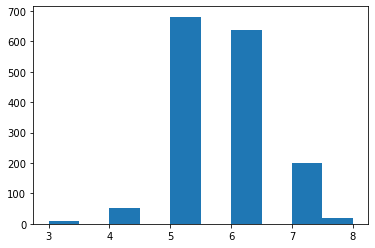

In [18]:
plt.hist(df["quality"])

In [20]:
df.groupby ("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Como vemos en la tabla de promedios, la volatilidad del ácido y los cloros influyen negativamente en la calidad del vino. Los sulfatos influyes positivamente al igual que el ácido cítrico. 2- , 2+ y el reso neutras. La idea es ver la influencia de las variables en el resultado final.

## Normalización de los datos

In [22]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


Todos los valores oscilarán entre cero y uno mediante la normalización.

## Clustering jerárquico con scikit-learn

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [27]:
clus.labels_

array([2, 2, 2, ..., 4, 4, 0], dtype=int64)

In [44]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

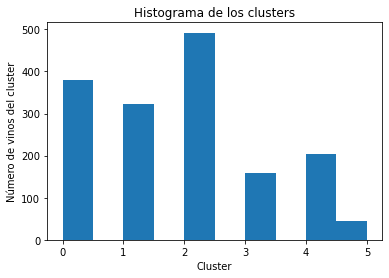

In [45]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [30]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
Z = linkage(df_norm, "ward")

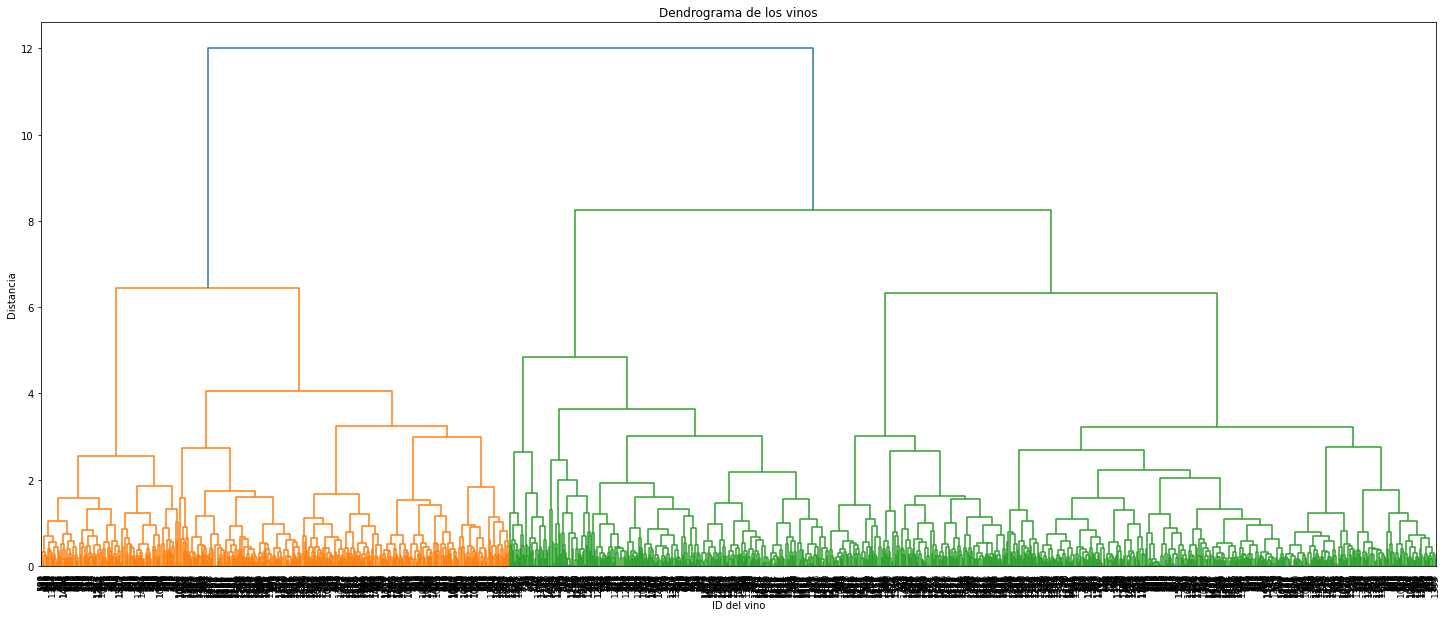

In [34]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=9.)
plt.show()

In [35]:
def dendrogram_tuned(*args, **kwargs):
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering Jerárquico con Dendrograma Truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above: 
                plt.plot(x,y, 'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

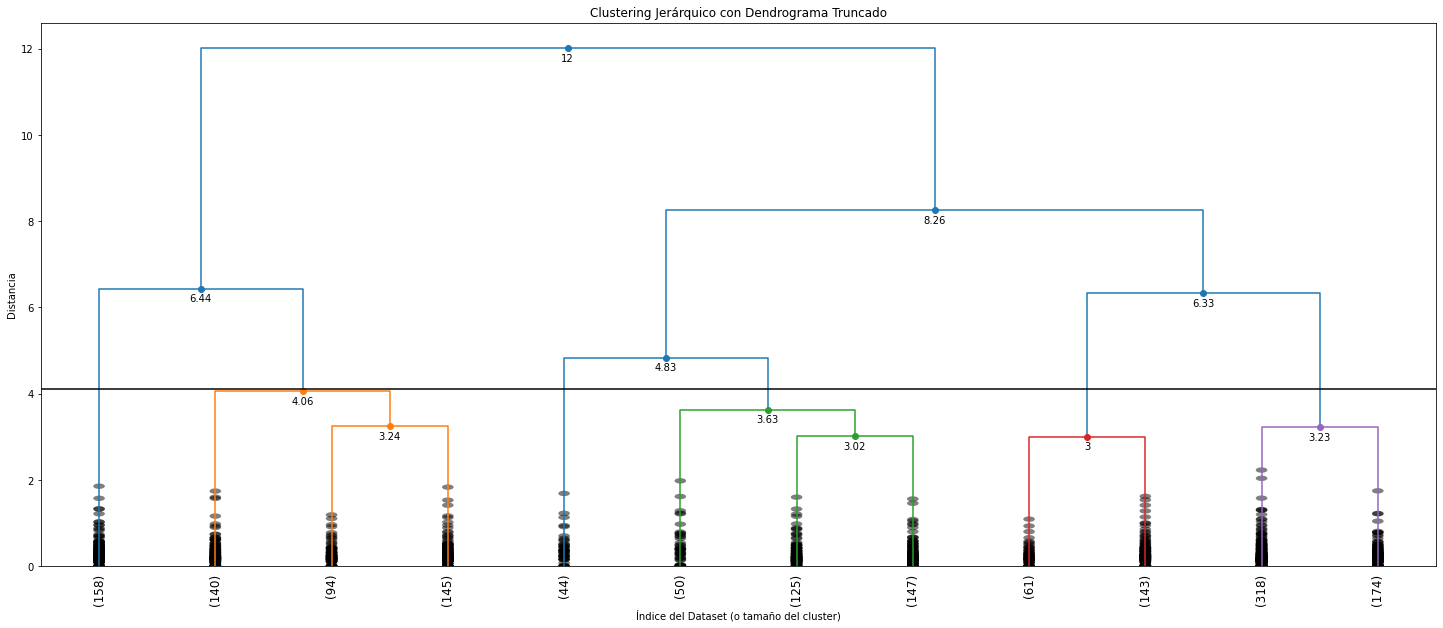

In [38]:
plt.figure(figsize=(25,10))
dendrogram_tuned(Z, truncate_mode='lastp', p=12, 
                 leaf_rotation=90., leaf_font_size=12., show_contracted=True,
                 annotate_above=3, max_d = 4.1)
plt.show()

## K-means

In [69]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [70]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [71]:
md_k = pd.Series(model.labels_)

In [72]:
df_norm["clust_h"]=md_h
df_norm["clust_k"]=md_k

In [73]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


(array([365.,   0., 300.,   0., 468.,   0., 325.,   0.,  40., 101.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

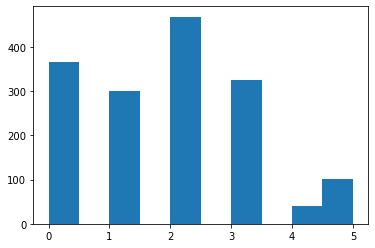

In [74]:
plt.hist(md_k)

In [63]:
model.cluster_centers_

array([[3.75027276e-01, 2.82107337e-01, 2.83013699e-01, 1.04531807e-01,
        1.11976582e-01, 1.95755354e-01, 1.09347016e-01, 4.84175165e-01,
        4.61115306e-01, 2.07628578e-01, 3.94836670e-01, 5.67123288e-01,
        3.61369863e+00, 2.00000000e+00],
       [3.07182800e-01, 2.84845365e-01, 2.92975460e-01, 1.49445332e-01,
        1.26954945e-01, 3.46496155e-01, 2.83205792e-01, 5.36028306e-01,
        4.36138351e-01, 1.75636457e-01, 2.05128205e-01, 4.52147239e-01,
        1.07975460e+00, 3.99693252e+00],
       [2.64368687e-01, 3.60762371e-01, 1.07387580e-01, 9.12264234e-02,
        1.23735848e-01, 1.44418976e-01, 1.01527682e-01, 4.88513554e-01,
        4.89571566e-01, 1.52713844e-01, 2.26102235e-01, 4.52676660e-01,
        2.00214133e+00, 1.01927195e+00],
       [3.61150442e-01, 1.64486301e-01, 4.15266667e-01, 1.05365297e-01,
        1.07779633e-01, 1.83309859e-01, 9.98586572e-02, 4.27513461e-01,
        4.26272966e-01, 2.28822355e-01, 4.59743590e-01, 6.76000000e-01,
        1.666

In [64]:
model.inertia_

458.263238598056

## Interpretación final

In [127]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.375027,0.282107,0.283014,0.104532,0.111977,0.195755,0.109347,0.484175,0.461115,0.207629,0.394837,0.567123,3.613699
1,0.361150,0.164486,0.415267,0.105365,0.107780,0.183310,0.099859,0.427513,0.426273,0.228822,0.459744,0.676000,0.016667
2,0.264447,0.360679,0.107500,0.091163,0.123661,0.144171,0.101386,0.488431,0.489670,0.153142,0.226309,0.453419,2.002137
3,0.307202,0.284731,0.293385,0.149715,0.127073,0.347476,0.283968,0.536293,0.435833,0.175090,0.204765,0.451077,1.076923
4,0.344469,0.302055,0.427750,0.084075,0.428214,0.251761,0.208392,0.510683,0.283465,0.495359,0.217308,0.470000,4.700000
5,0.433015,0.207073,0.422178,0.148854,0.118299,0.179055,0.106007,0.550116,0.403212,0.211656,0.341203,0.550495,0.168317


In [80]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


In [77]:
from scipy.cluster.hierarchy import fcluster

In [110]:
X = df_norm.columns.values.tolist()[13:]
X1 = df_norm[X]

In [123]:
df_norm["clust_k"]

0       2
1       2
2       2
3       0
4       2
       ..
1594    0
1595    0
1596    0
1597    0
1598    1
Name: clust_k, Length: 1599, dtype: int32

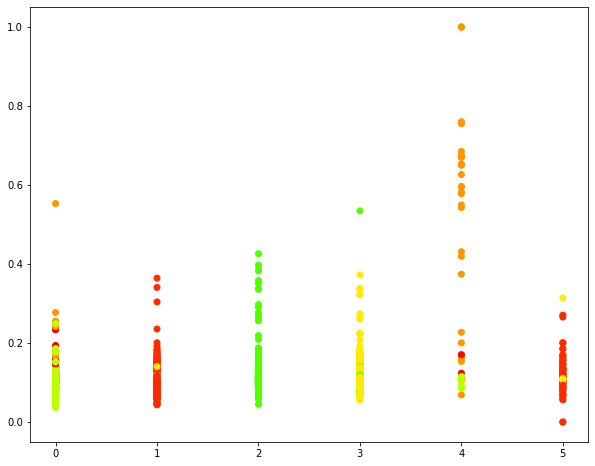

In [125]:
max_d=4.2
clusters = fcluster(Z, max_d, criterion="distance")
plt.figure(figsize=(10,8))
plt.scatter(df_norm["clust_k"], df_norm["chlorides"], c= clusters, cmap="prism")
plt.show()

No se puede hacer una representación gráfica con más de una variable, pues requerimos 12 dimensiones para ver la nube de dispersión. Sólo se podría hacer seleccionadndo alguna columna contra otra columna.